## Laptop Exploratory Data Anaylsis

We've done some of the initial clean-up on the data and scratched the surface of what can be done with our data.

We will start by looking for any numerical outliers as well as plotting out some basic information from our data. Based on these plots and the domain knowledge we have, we will beging to make a plan as to how we wish to further analyze the data. 

The goal of this EDA is to understand how different features relate to each other and begin to consider which key features we would like to pursue first in our analysis of the data. At the end of this report, we should have a good understanding of how the laptop data is distributed.

To begin with, we ended up with some data columns that are categorical and some that are numerical. Lets first explore the categorical data and then explore the numerical data.

In [1]:
#As always, we begin with our imports.
#We will be importing pandas and numpy for our numerical analysis
#We will be importing pyplot and seaborn in order to visualize our data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading our data
#First column is our indices so read that in to avoid duplicate
laptop_df = pd.read_csv('./dataset/tim_laptop_cleaned.csv', index_col = 0)

In [3]:
#Lets remind ourselves what data we have and explore the data
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    int64  
 6   ram_type         896 non-null    object 
 7   ssd_gb           896 non-null    int64  
 8   hdd_gb           896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  msoffice         896 non-null    object 
 16  latest_price     896 non-null    float64
dtypes: float64(1), i

In [4]:
laptop_df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd_gb,hdd_gb,os,os_bit,graphic_card_gb,weight,display_size,warranty,msoffice,latest_price
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4,DDR4,0,1024,Windows,64,0,ThinNlight,Missing,0,No,324.87
1,Lenovo,Ideapad,AMD,APU Dual,10th,4,DDR4,0,512,Windows,64,0,Casual,Missing,0,No,254.67
2,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64,0,ThinNlight,Missing,0,No,259.87
3,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64,0,ThinNlight,Missing,0,No,279.37
4,Avita,PURA,AMD,APU Dual,10th,4,DDR4,256,0,Windows,64,0,ThinNlight,Missing,0,No,324.87


## Initial Thoughts

So we have a mixture of string and numerical data. Lets look at our data and see what information we can glean from it. We did some of this already during our data wrangling so lets just make sure we put it in here and take a second look at it. 

The plan here is to first get counts of the data and look at the distribution of values that we have. Then we will see how these features correlate/compare to our target variable: `latest_price` and see if there are any initial insights that we can make from a simple 2-D analysis of the data.

We will start with bar charts. First, we will not include `latest_price` because it is our target and it just doesn't make sense to include latest price in our bar charts. We wil create a bar chart for `model` separately as it is such a large chart and requires more space.

In [5]:
#Create a function that can count our columns for us and input our target columns
#Brand will be a separate bar-chart that we will explore later as we noted in the data wrangling it was a large chart.

def count_column(df,col_list):
    count = {}
    for elem in col_list:
        count[elem] = df[elem].value_counts()
    return count


#We will drop 'latest_price' for the reasons above
columns_to_count = laptop_df.columns
columns_to_count = columns_to_count.drop(['latest_price'])
laptop_string_counts = count_column(laptop_df, columns_to_count)

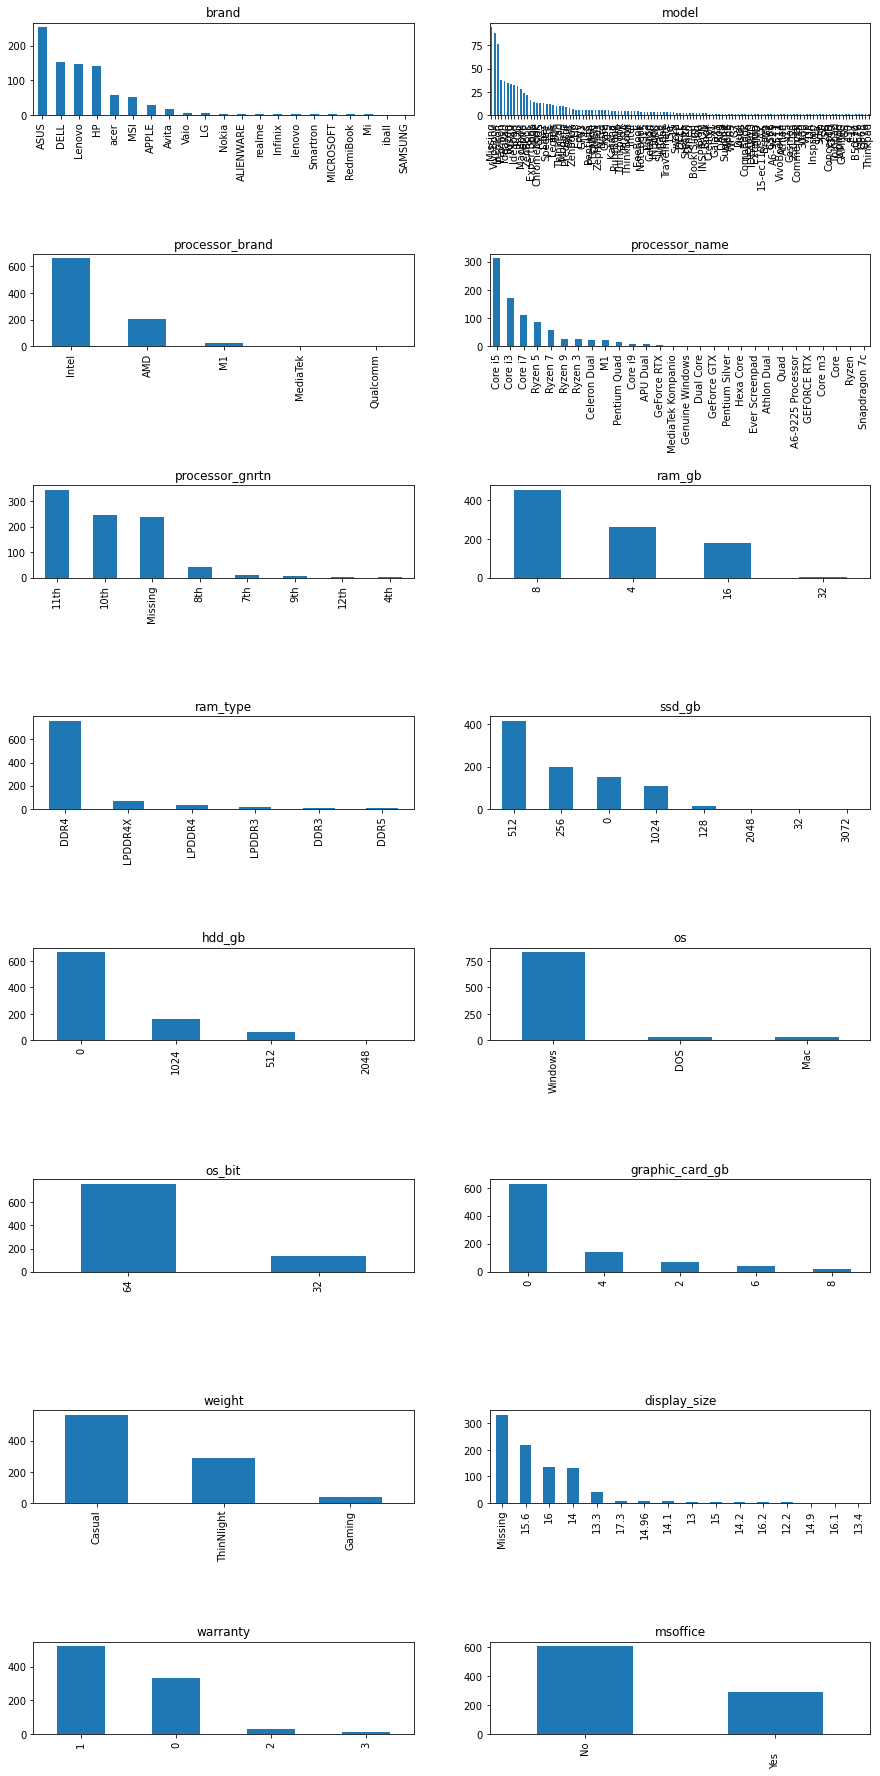

In [6]:
plt.figure(figsize = (15,40))
plt.subplots_adjust(hspace = 1.5)

    
for n, key in enumerate(laptop_string_counts):
    ax = plt.subplot(10,2,n+1)
    laptop_string_counts[key].plot(kind = 'bar', ax = ax, title = key)
    
for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(15);

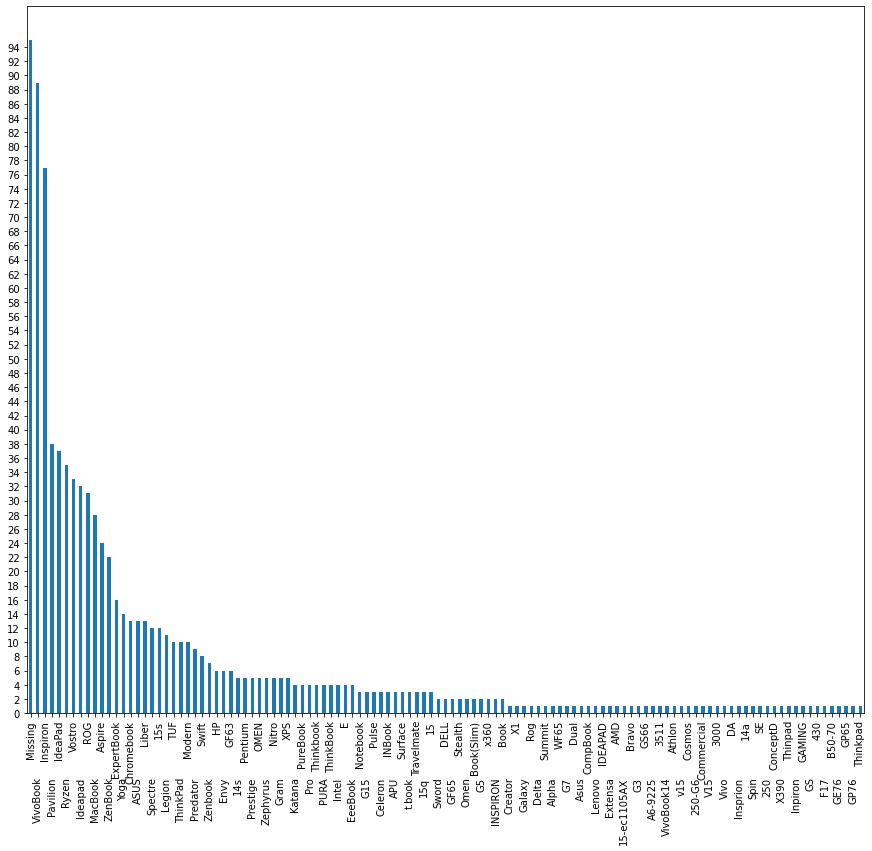

In [7]:
#Expanding on the barchart we want to look at the model breakdown

fig, ax = plt.subplots(figsize = (15,13))
laptop_string_counts['model'].plot(kind='bar', ax =ax)

for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(60)
    
plt.yticks(np.arange(0,max(laptop_string_counts['model']),2));

## Initial Impressions

The data is definitely not well distributed as we see some categories are quite imbalanced. This may be something we want to account for as we look into our model. This is a sign that perhaps clustering may be a good approach for our data as it allows us to look at the features grouped with each other and consider which features are the most important. 

Of concern is the amount of "missing" data points. We primarily see missing in `display_size` and `processor_gnrtn`. Both of these are pretty important features to consider for a laptop so it would be painful to drop these features entirely. It may be possible to look at how the data was scrapped and perhaps come up with a solution to fill in the missing data. Otherwise, the amount of data that is considered "Missing" is something we'll have to account for in our model.

Something like `msoffice` may not be useful as it is either "yes" or "no" and leaning heavily towards "no". `Warranty` data may be be looked at as binary "yes" or "no" as it might not matter how long the warranty is for our laptops.

Under the display_size, we see a range of numbers. I think that it would be best to round these sizes up or down to the nearest integer as some of these screen-size are very close to each other such as 13.3 and 13 and 14.1 and 14. 



## Numerical Interpretations

Lets look at some of the numerical information that is present in the data. 

Reminder that the following information has the type int: 
`ram`, `ssd_gb`, `hdd_gb`, `os_bit`, `graphic_card_gb`, `warranty`, `latest_price`.

We can first look at the distribution of prices overall as we did in the beginning.
We will look at pairplots and a heatmap to see if we can find some initial correlations.
We will then look at how each of the features compare in pricing ranges as box plots to get a feel for how much a certain feature may weigh up against the price.

Scatters don't really make sense for the data here because none of it is really continuous. Most of it is definitely going to be discrete and categorical so it is better to look at it in that way.


In [8]:
laptop_df.describe()

,ram_gb,ssd_gb,hdd_gb,os_bit,graphic_card_gb,warranty,latest_price
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,8.531250,432.321429,226.857143,59.178571,1.198661,0.691964,992.028186
std,4.376055,316.118420,405.394129,11.453644,2.057454,0.606282,605.973607
min,4.000000,0.000000,0.000000,32.000000,0.000000,0.000000,181.870000
25%,4.000000,256.000000,0.000000,64.000000,0.000000,0.000000,591.370000
50%,8.000000,512.000000,0.000000,64.000000,0.000000,1.000000,825.422000
75%,8.000000,512.000000,512.000000,64.000000,2.000000,1.000000,1158.170000
max,32.000000,3072.000000,2048.000000,64.000000,8.000000,3.000000,5745.870000


This is interesting information but I think we can get more info out of this by looking at how the price distribution looks like and where the median lies.

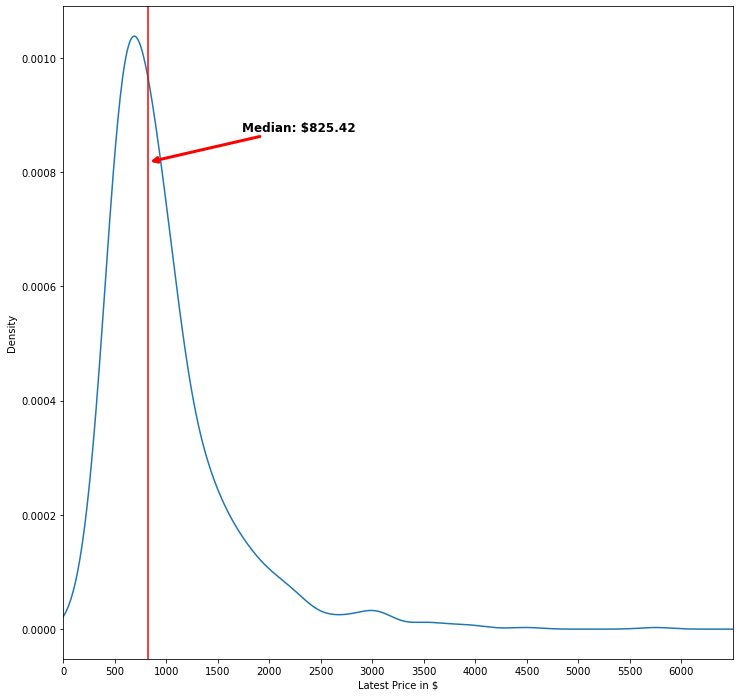

In [9]:
#Lets plot out the distribution of our prices and take a look
price_median = round(laptop_df['latest_price'].median(),2)
fig = plt.figure(figsize=(12,12))
laptop_df['latest_price'].plot(kind = 'density')
plt.axvline(price_median, c = 'r')
plt.annotate('Median: $'+str(price_median),
             xy = (price_median, plt.ylim()[1]*0.75),
             xytext = (price_median+ plt.xlim()[1]*0.1, plt.ylim()[1] * 0.8),
             textcoords = 'data',
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', lw = 3, color = 'r'),
             fontweight = 'bold', fontsize = 'large')


plt.xlim(0,6500)
plt.xticks(np.arange(0,6500,500));
plt.xlabel('Latest Price in $');

<br>
We can see that the price median is at $825.42 which denotes that more than half the laptop price data sits at or below this point and the rest of the more expensive laptop data is spread out across the rest of the laptops.

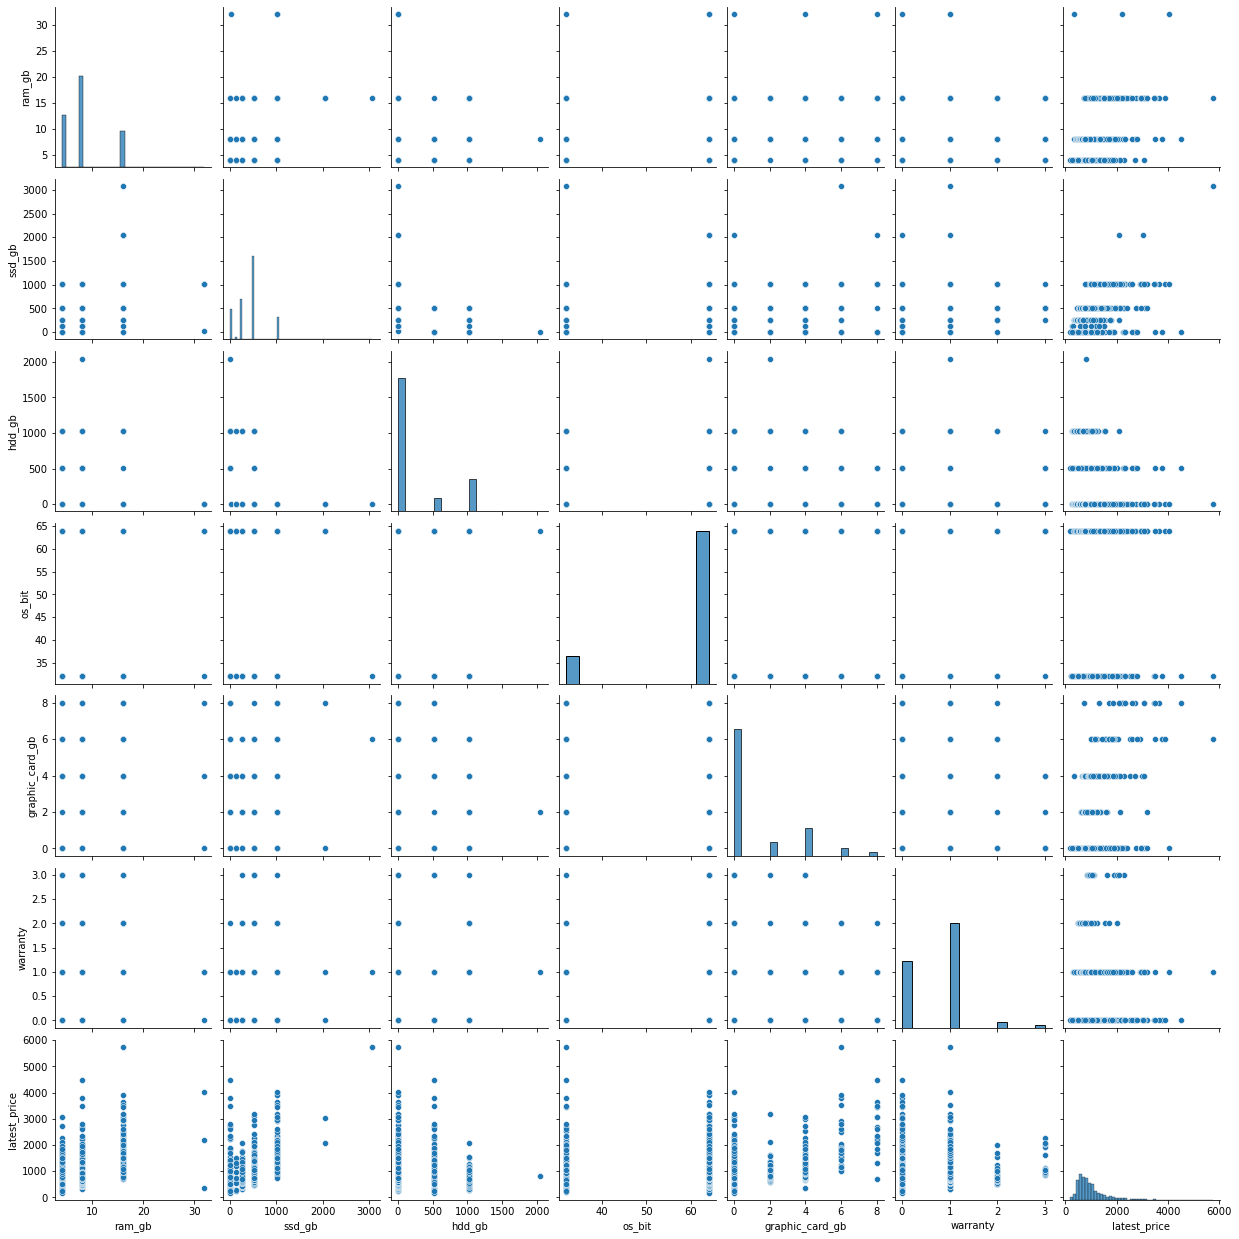

In [10]:
#Look at the pairplots, see if we can find any obvious correlations
_ = sns.pairplot(laptop_df)

<br>
From this pairplot, nothing jumps out at me immediately. It definitely feels like the data is distributed pretty fairly across all of the features. Maybe a heatmap can tell us more.

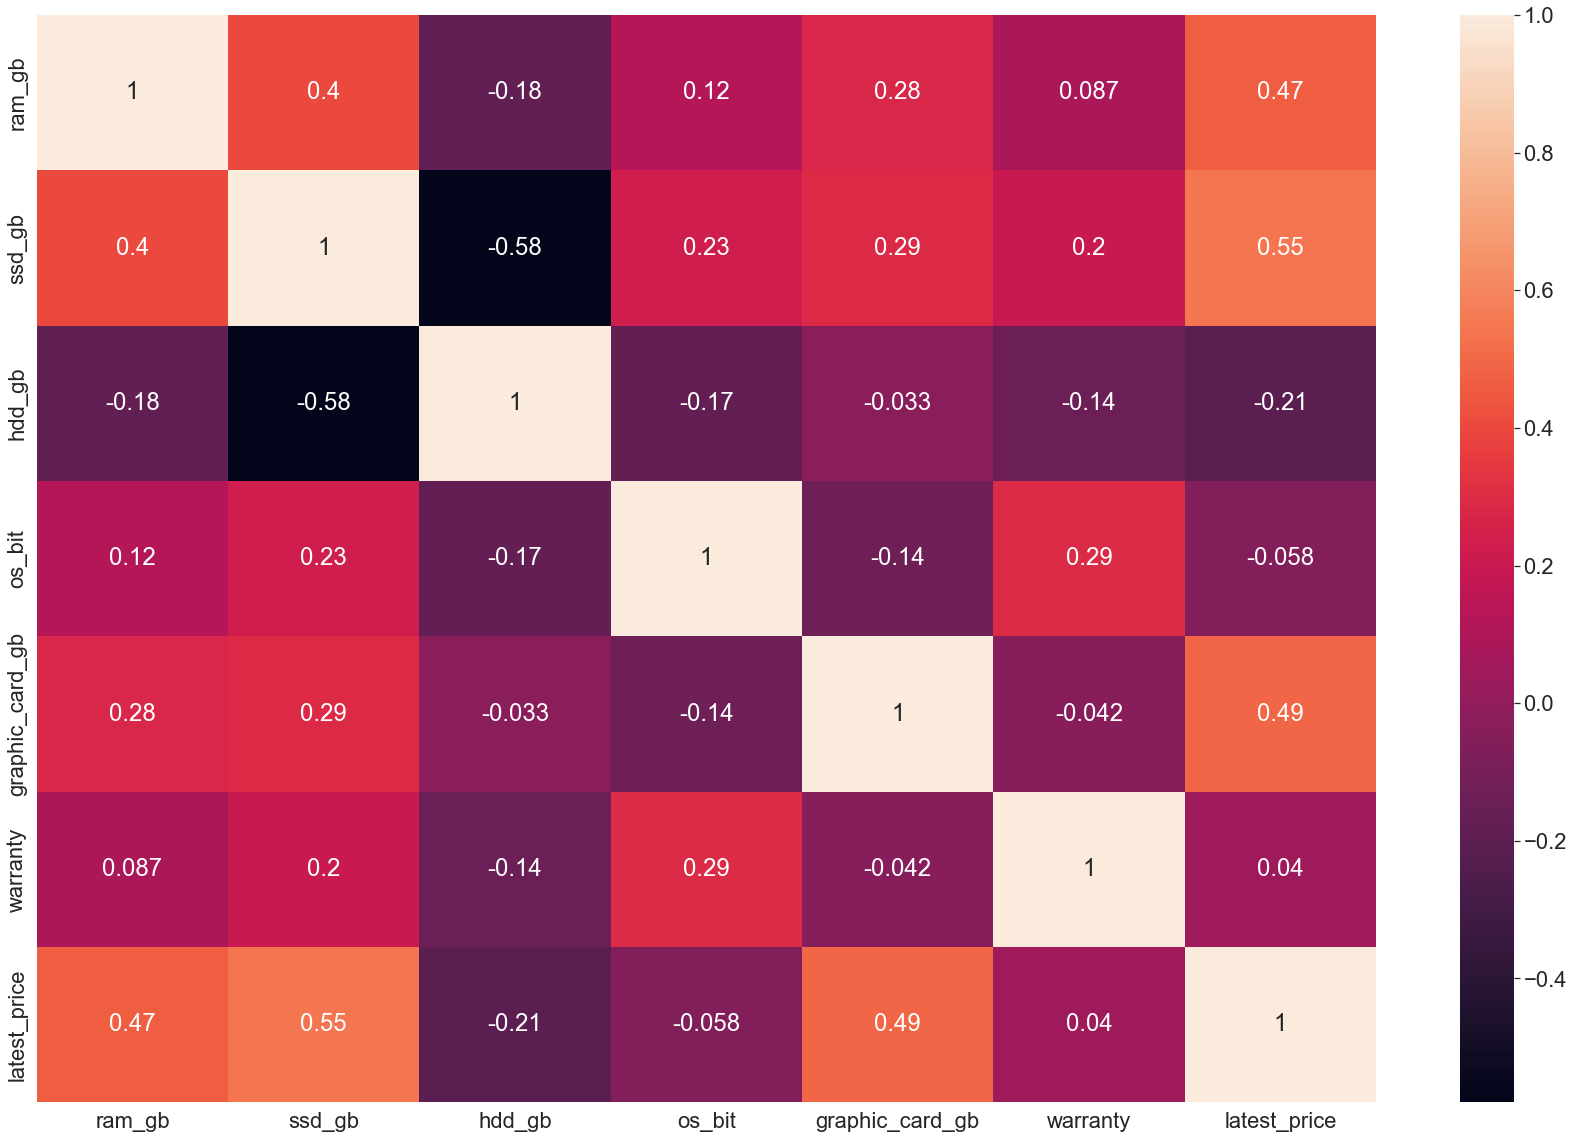

In [11]:
#Utilize heatmaps as another way of visualizing
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(laptop_df.corr(), annot=True);

<br>
With this we can definitely get a lot more imformation. While the data is categorical we can get a sense for the price combined with other features. It seems there is some correlation with `ssd_gb`,`graphic_card_gb`, and `ram` with our target `latest_price`. Some things that have little correlation (which makes sense) are `warranty` and it seems it has little to do with our price. Surprisingly, there is a slight negative correlation with `hdd_gb` which means the larger hard disk drives do not improve our prices but a larger solid state drive might.


It seems like `hdd_gb` and `ssd_gb` are greatly negatively correlated which makes sense as the presence of one usually denotes the lack of the other as most of the laptops in our dataset do not contain both a ssd and a hdd.

## Looking at Average Prices by Brand and Box Plots

In this section, we want to look at how certain brands price their laptops. We start by looking at the average price before plotting out box plots. It could be a sign that certain brands hold more value over others and there may be some interesting pricing distributions. 

Additionally, we want to compare the ranges of the prices for each of our features so we will be creating some box plots that look at these price ranges. All that information will be below.


In [12]:
#average price by brand
#Lets look at the average price by brand first and see what we get
laptop_brand_prices = laptop_df[['brand','latest_price']]
laptop_average_brand = laptop_brand_prices.groupby(by = 'brand').agg('mean')
laptop_average_brand.sort_values(by = 'latest_price', ascending = False)

,latest_price
brand,
ALIENWARE,3345.745000
APPLE,1972.202143
lenovo,1507.904667
MSI,1267.157750
MICROSOFT,1266.109000
ASUS,1029.882161
LG,990.470000
acer,938.916259
Lenovo,935.022892


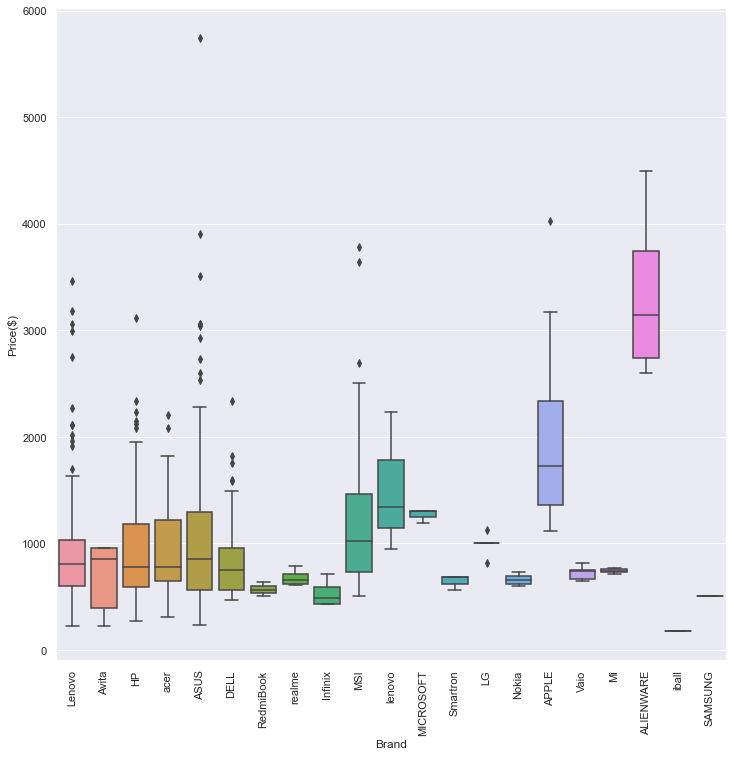

In [13]:
#Create barplot with the branding price that we created earlier. 
#This might give us some insight into how prices are distributed and some outliers to look out for.
sns.set(font_scale = 1)
plt.subplots(figsize=(12,12))
sns.boxplot(x='brand', y='latest_price', data = laptop_brand_prices)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price($)')
plt.xlabel('Brand');

In [14]:
#There is only one laptop with a price greater than $5,000 so lets look at those specs.
laptop_df[laptop_df['latest_price'] > 5000]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd_gb,hdd_gb,os,os_bit,graphic_card_gb,weight,display_size,warranty,msoffice,latest_price
636,ASUS,Zephyrus,Intel,Core i9,11th,16,DDR4,3072,0,Windows,32,6,Casual,Missing,1,No,5745.87


<br>
As stated in the previous analysis, this one outlier makes sense given its specs. We are keeping it in. 

Otherwise, it seems most of the brands fall into expected priceranges. Alienware is slightly more expensive as it is marketed as a more expensive computer and Apple also falls in that category. For the most part, other brands stay within their price bracket with a few high-end models outside of that. Lets look at some more data such as model comparison.

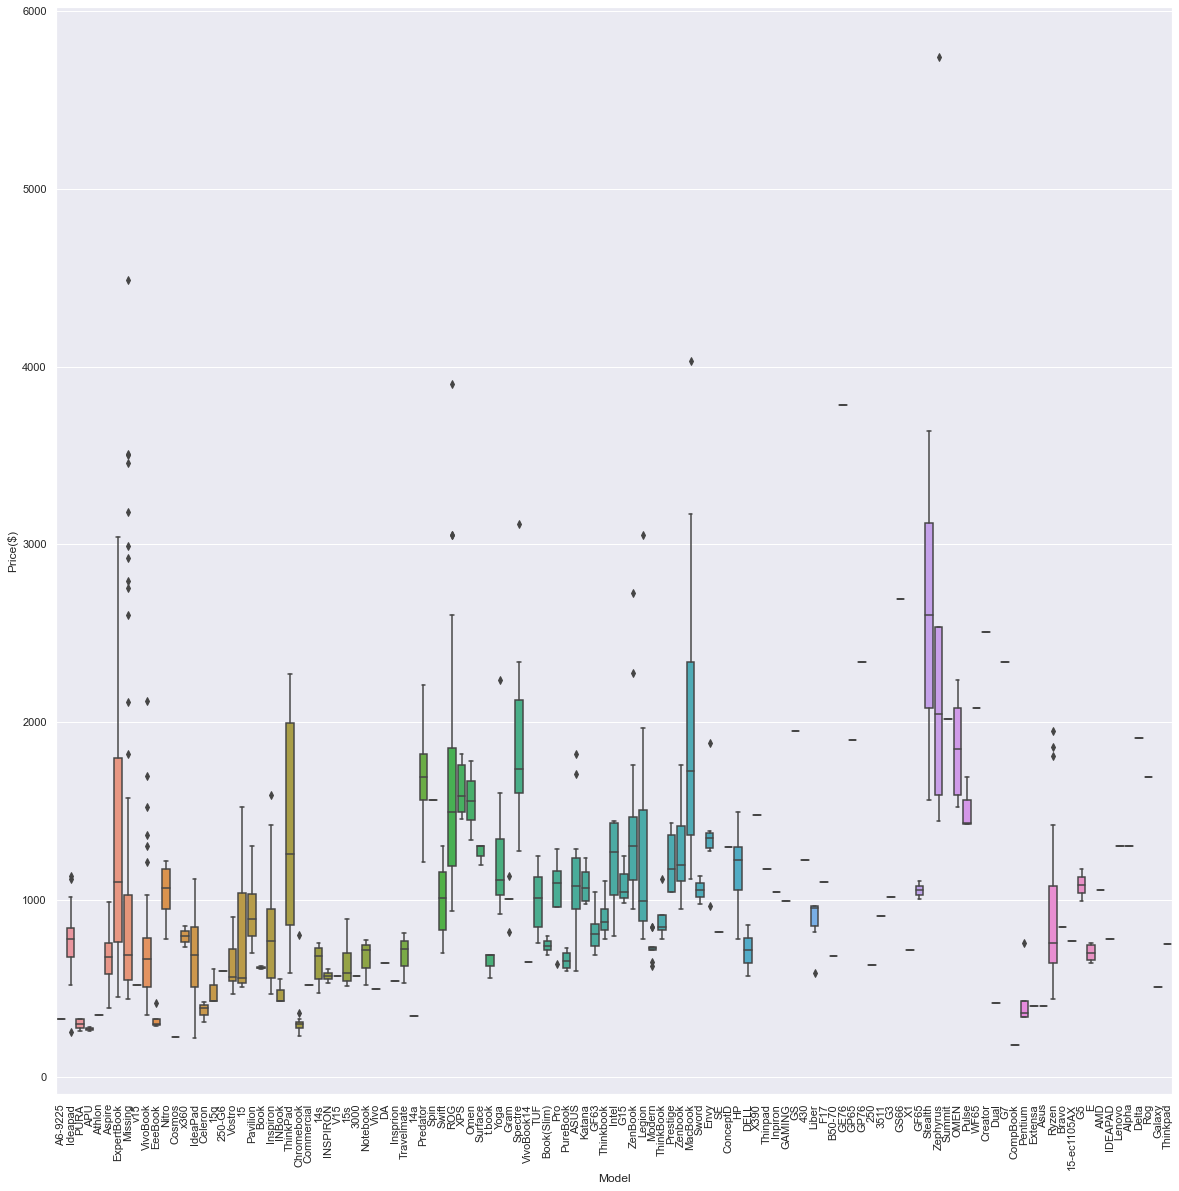

In [15]:
#This plot is somewhat wild, apologies

plt.subplots(figsize=(20,20))
sns.boxplot(x='model', y='latest_price', data = laptop_df)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price($)')
plt.xlabel('Model');


This model data is kind of messy so it is difficult to get any specific data out of it. We see that "Missing" shows up again and we have an issue with its data, otherwise I am reluctant to use this box plot as a means of analysis.

In [16]:
#We looked at brand and model so we can drop those, 
#We also drop latest price because we don't want to include that in our analysis
laptop_df_noprice = laptop_df.drop(['latest_price','brand', 'model'], axis = 1)

<Figure size 432x288 with 0 Axes>

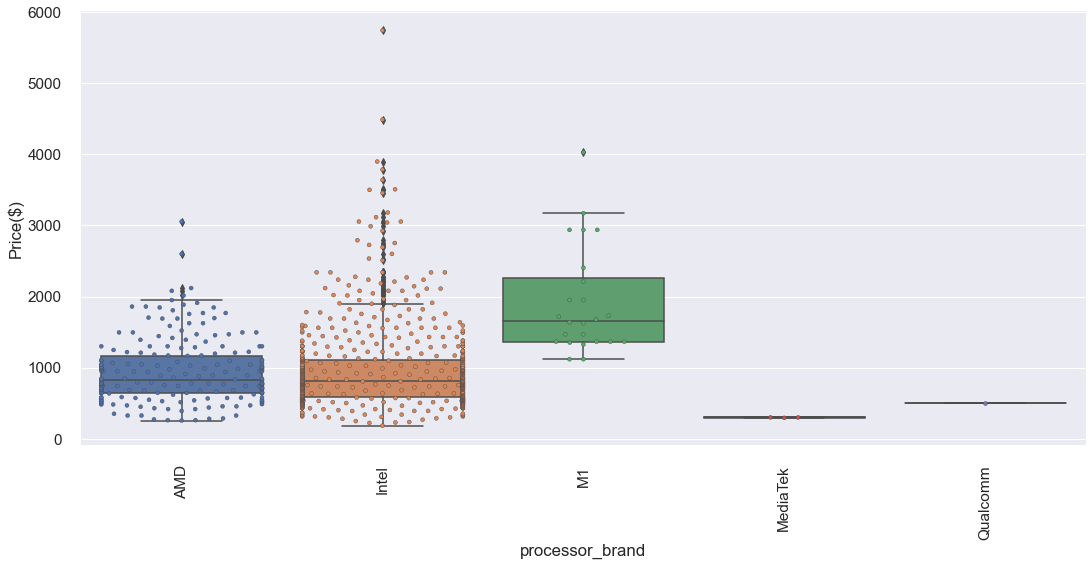

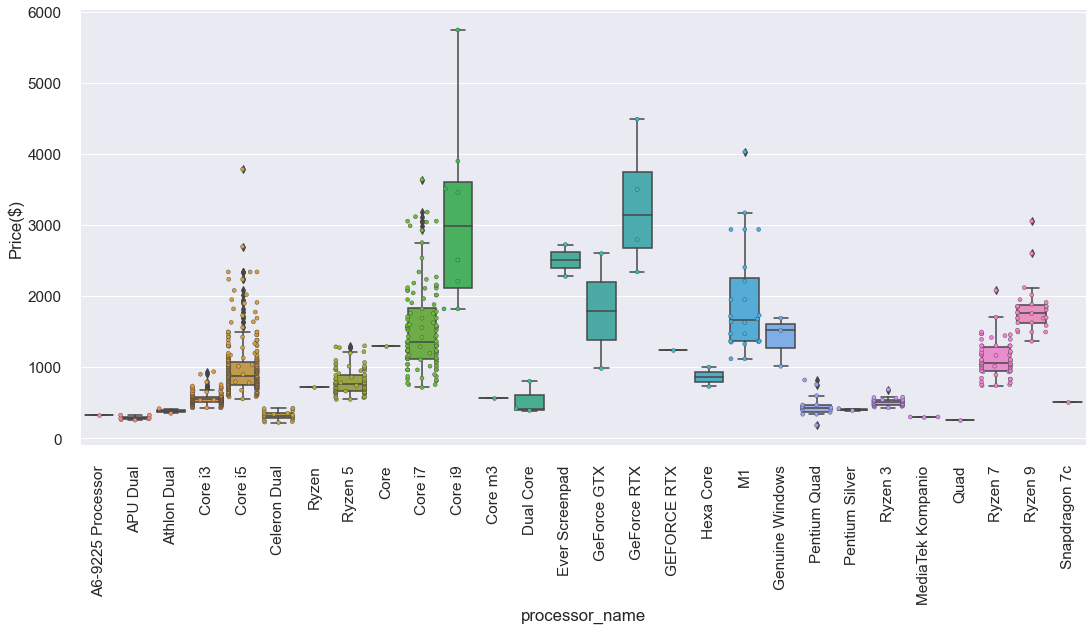

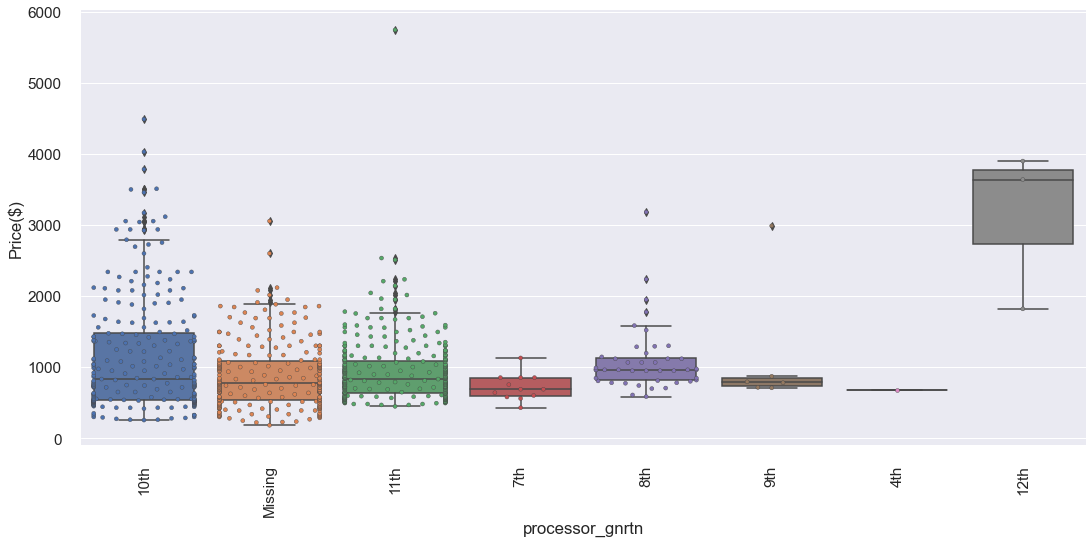

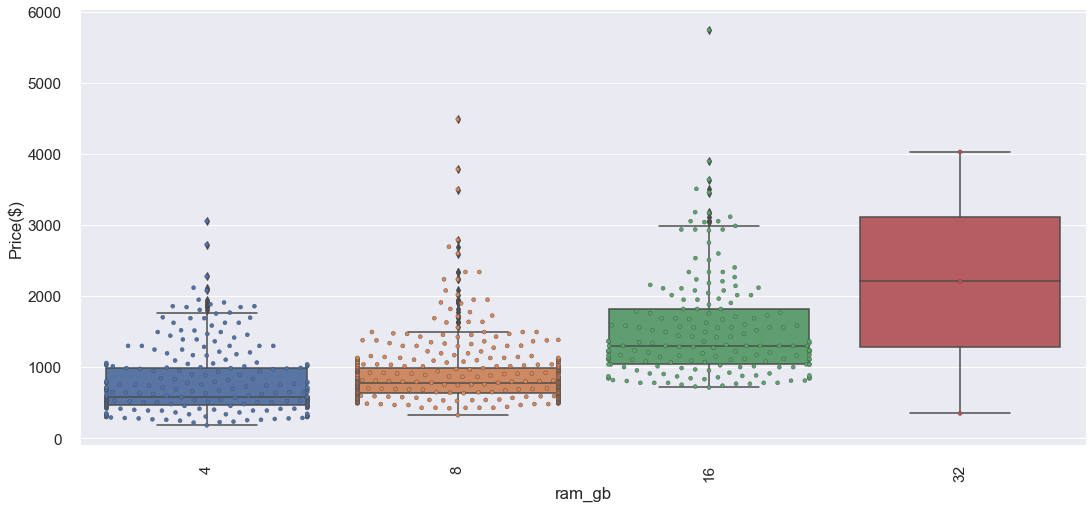

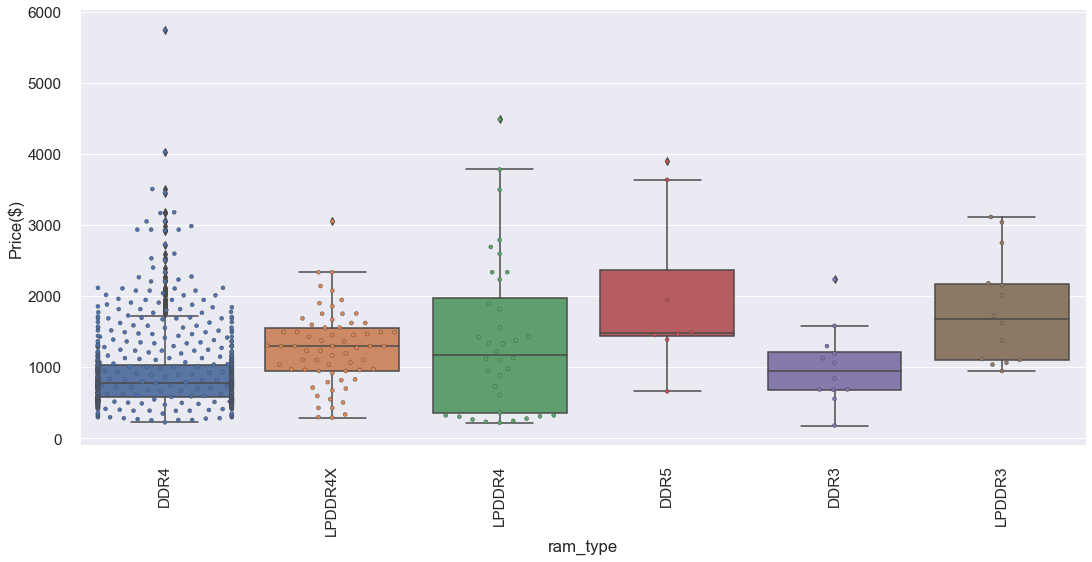

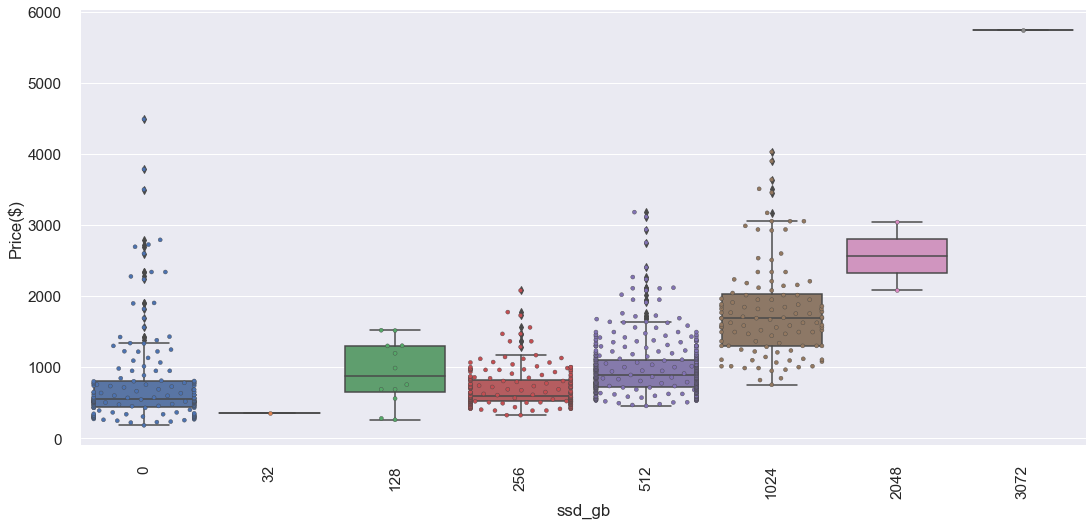

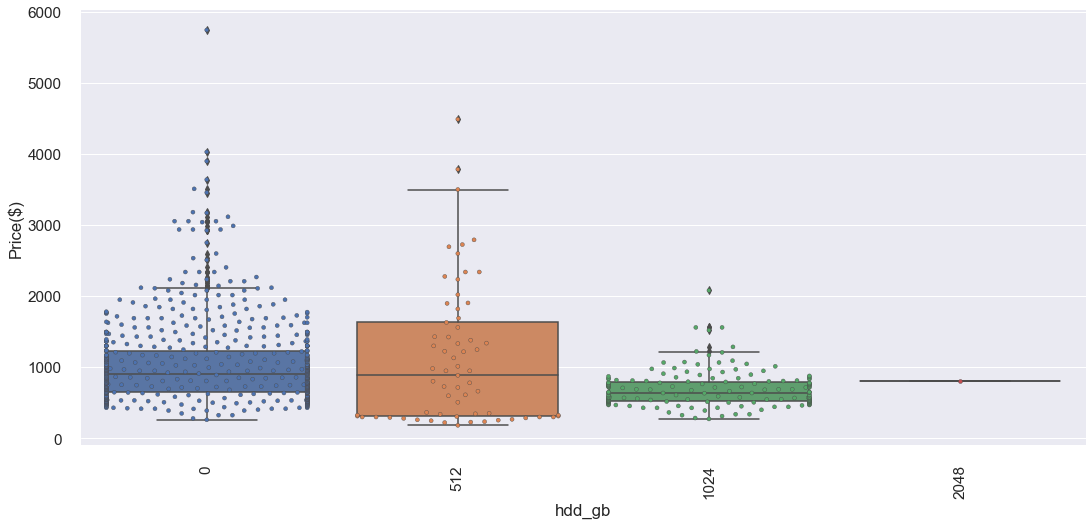

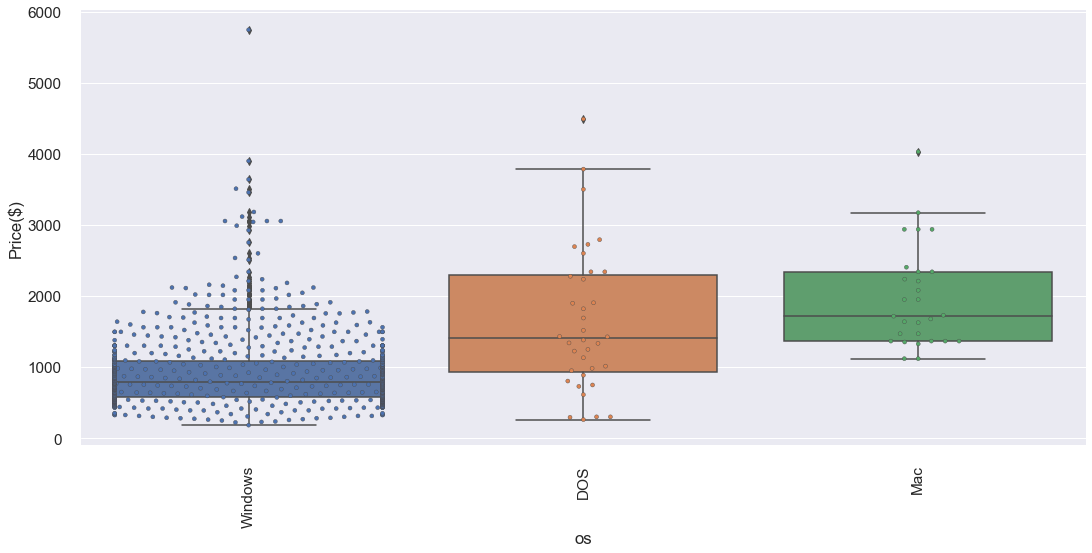

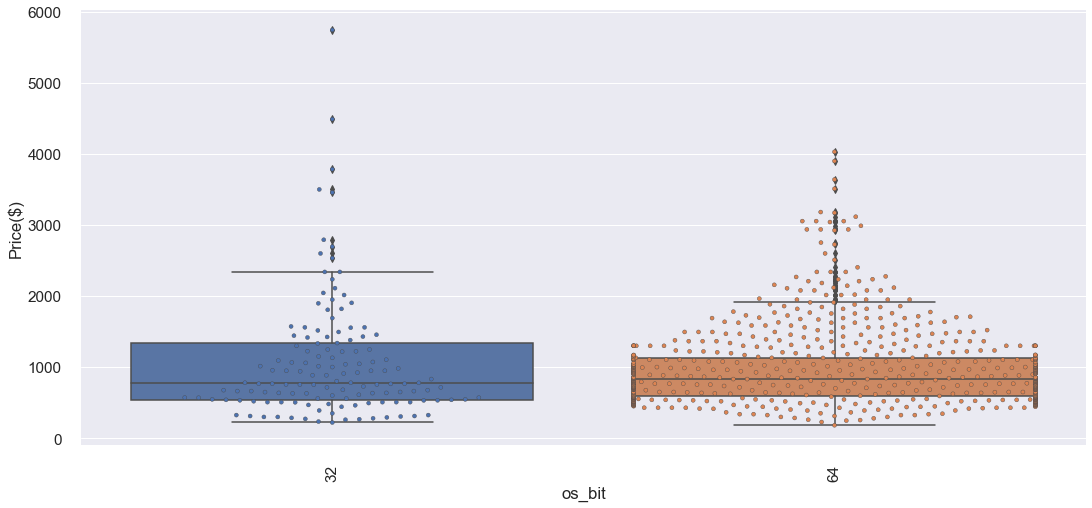

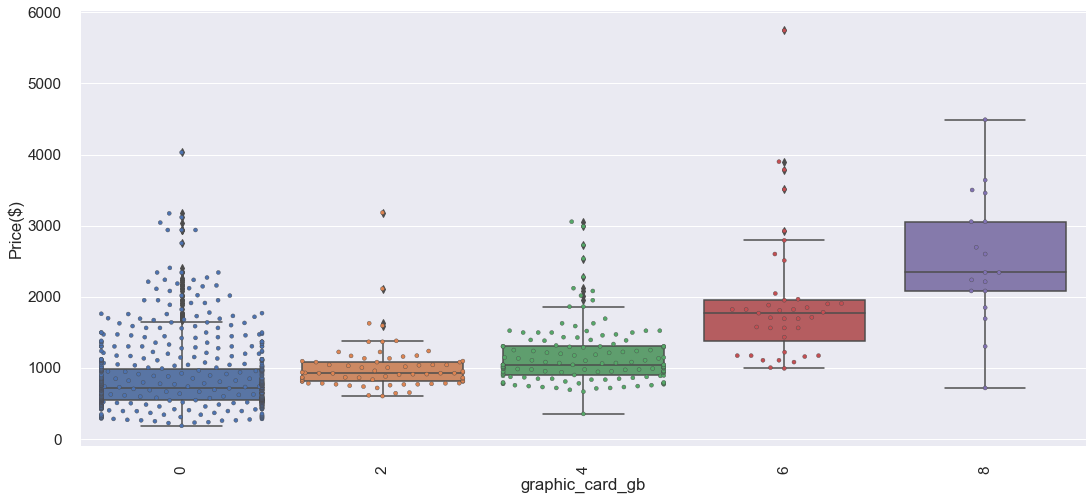

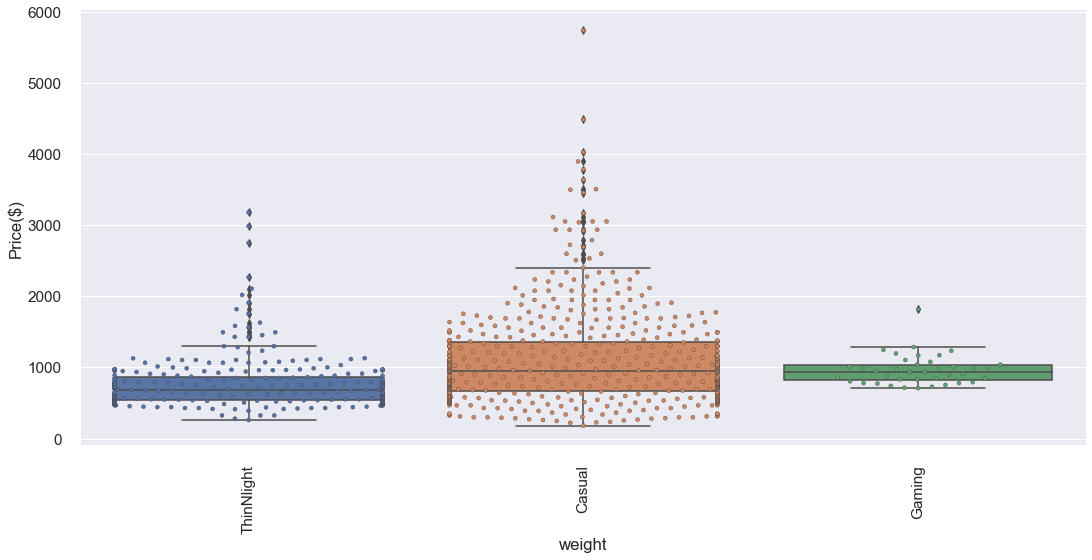

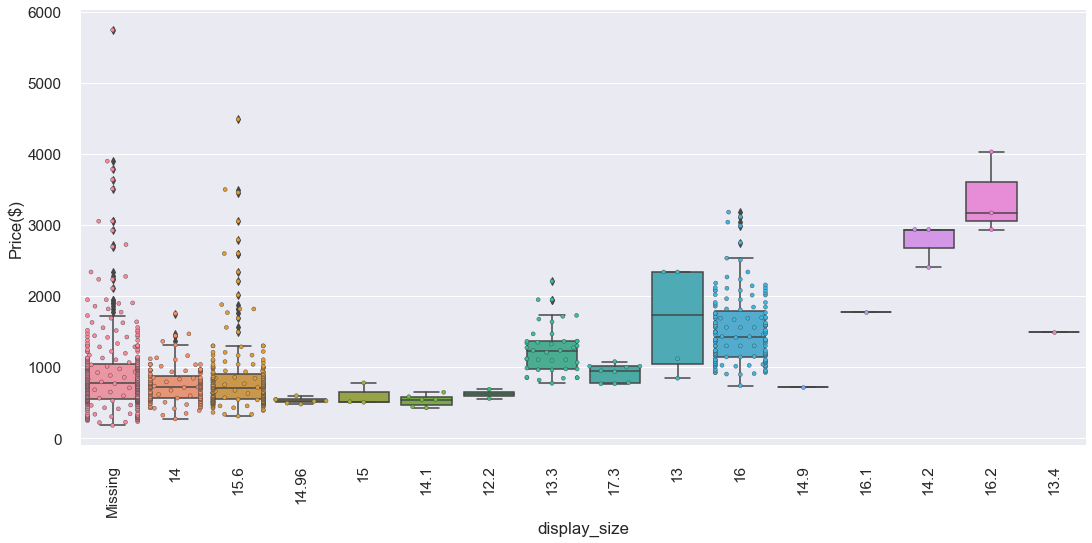

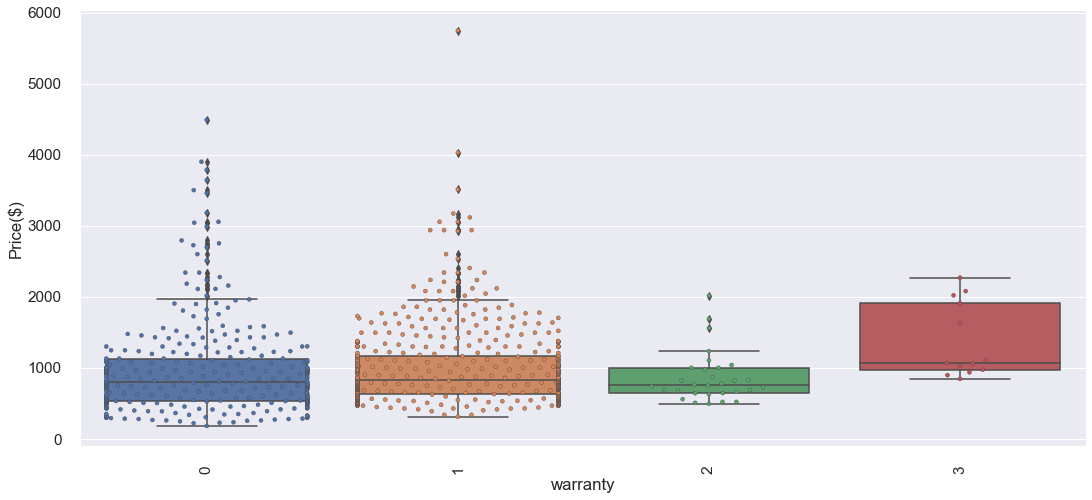

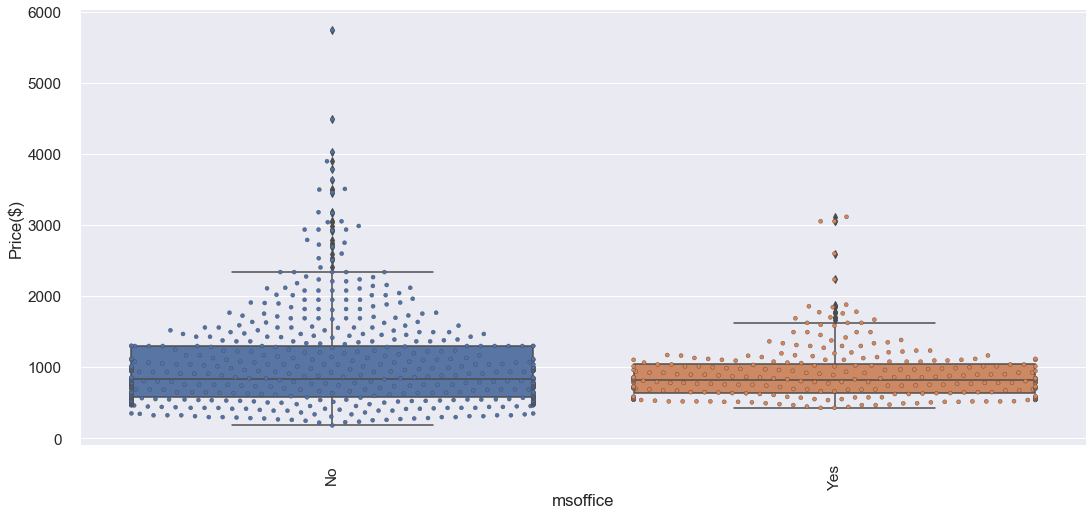

In [17]:
#Box plots for all of our features, analysis at the end
plt.subplots_adjust(hspace = 1.5)

laptop_cols_noprice = laptop_df_noprice.columns
    
for col in laptop_df_noprice.columns:
    sns.set(font_scale = 1.4)
    fig,ax = plt.subplots()
    sns.boxplot(x=col, y='latest_price', data = laptop_df);
    sns.swarmplot(x=col, y ='latest_price', data = laptop_df, size=4,linewidth= 0.4);
    sns.despine(offset = 10, trim = True)
    fig.set_size_inches(18,8)
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Price($)')
    plt.xlabel(col);

## Final Impressions

So far, we have seen that there seems to be little variance in price when it comes to our price ranges. Every feature for the most part falls in-line with its competitors. We do see that for `processor_name` that Corei9 sits above the other processors which makes sens as it is one of the more powerful processors on the market and is part of our Asus Zephyr outlier from earlier. Most of the `processor_gnrtn` sits in the same range except for the 12th which sits above the rest but with no outliers. 

It would seem that each individual feature does not cause a large amount of variance in the price and that it would be a combination of these features which cause the price increases. I am reluctant to remove any specific features for the time being. It may be useful to recreate some of the data as binary (such as `warranty`) in order to simplify the feature analysis and to remove some data such as `msoffice` which does not seem to add to our analysis. I would like to reduce the amount of groups in `display_size` and simply round these numbers to the nearest size so taht the data is more compact as a difference of 0.1-0.2" is due to how these sizes are displayed on the product website and may not be indicative of any significant differences.

The exploration has told me more about my data and how I want to treat it moving forward. What may be useful is taking a clustering approach and giving us a price range given our laptop's specifications or using a GLM in order to perform regression analysis. Further research into our ML models may help us find a better model.